<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/dali%2C_openjourney%2C_SD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sangjin521","key":"cf53b3cce9e21d3036905a168c2dc7d9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [1]:
#Fake directory 생성
!mkdir -p fake

#11분 정도 걸립니다... content/fake폴더 안에 생기도록 설정함.
# 해당 dataset png파일들만 존재..
#!kaggle datasets download -d vitaliykinakh/stable-imagenet1k -p fake --unzip
!kaggle datasets download -d jacobheldt/syntheticeue-ai-generated-images-dataset -p fake --unzip

Dataset URL: https://www.kaggle.com/datasets/jacobheldt/syntheticeue-ai-generated-images-dataset
License(s): CC0-1.0
100% 5.36G/5.36G [05:07<00:00, 21.4MB/s]
100% 5.36G/5.36G [05:07<00:00, 18.7MB/s]


## **ResNet_dali_64_10**

In [20]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/fake/SyntheticEye AI-Generated Images Dataset/Min-Dalle'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_fake_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 7000

# source_folder 내의 모든 파일 목록 가져오기
all_image_files = []
for item_name in os.listdir(source_folder):
    item_path = os.path.join(source_folder, item_name)
    # 폴더인지 확인
    if os.path.isdir(item_path):
        # 폴더 내의 이미지 파일 목록 추가
        all_image_files.extend([os.path.join(item_path, file) for file in os.listdir(item_path) if file.endswith('.png')])
    elif item_name.endswith('.png'):
        # 폴더가 아닌 이미지 파일 목록 추가
        all_image_files.append(item_path)

# 이미지 파일 목록에서 랜덤하게 선택
selected_real_images = random.sample(all_image_files, min(num_images_to_select, len(all_image_files)))

# 선택된 이미지를 대상 폴더로 복사
for source_image_path in selected_real_images:
    image_name = os.path.basename(source_image_path)
    destination_image_path = os.path.join(destination_folder, image_name)
    shutil.copy(source_image_path, destination_image_path)

print(f"{min(num_images_to_select, len(all_image_files))}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


7000개의 이미지를 랜덤으로 선택하여 /content/selected/selected_fake_images 폴더에 복사했습니다.


In [21]:
directory = '/content/selected/selected_fake_images'
file_count = len(os.listdir(directory))

print("Number of files in the directory:", file_count)

Number of files in the directory: 7000


In [22]:
#Real directory 생성
!mkdir -p real

#1분 정도 걸립니다. content/real 안에 생기도록 설정함.
# 해당 dataset JPEG 파일들만 존재..
!kaggle datasets download -d ifigotin/imagenetmini-1000 -p real --unzip

Dataset URL: https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000
License(s): unknown
100% 3.92G/3.92G [03:29<00:00, 22.3MB/s]
100% 3.92G/3.92G [03:29<00:00, 20.1MB/s]


In [28]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/real/imagenet-mini/train'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_real_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 10

# 모든 폴더 순회
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    # 폴더인지 확인
    if os.path.isdir(folder_path):
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
        # 랜덤하게 이미지 선택
        selected_real_images = random.sample(image_files, min(num_images_to_select, len(image_files)))
        # 선택된 이미지를 대상 폴더로 복사
        for image_name in selected_real_images:
            source_image_path = os.path.join(folder_path, image_name)
            destination_image_path = os.path.join(destination_folder, image_name)
            shutil.copy(source_image_path, destination_image_path)

print(f"{num_images_to_select}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


10개의 이미지를 랜덤으로 선택하여 /content/selected/selected_real_images 폴더에 복사했습니다.


In [29]:
directory = '/content/selected/selected_real_images'
file_count = len(os.listdir(directory))

print("Number of files in the directory:", file_count)

Number of files in the directory: 9989


**데이터 처리**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [30]:
dataset_dir1 = "/content/selected"
print("Loading dataset from: " + dataset_dir1)

Loading dataset from: /content/selected


In [31]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Found 16989 files belonging to 2 classes.
Class names: ['selected_fake_images', 'selected_real_images']
340


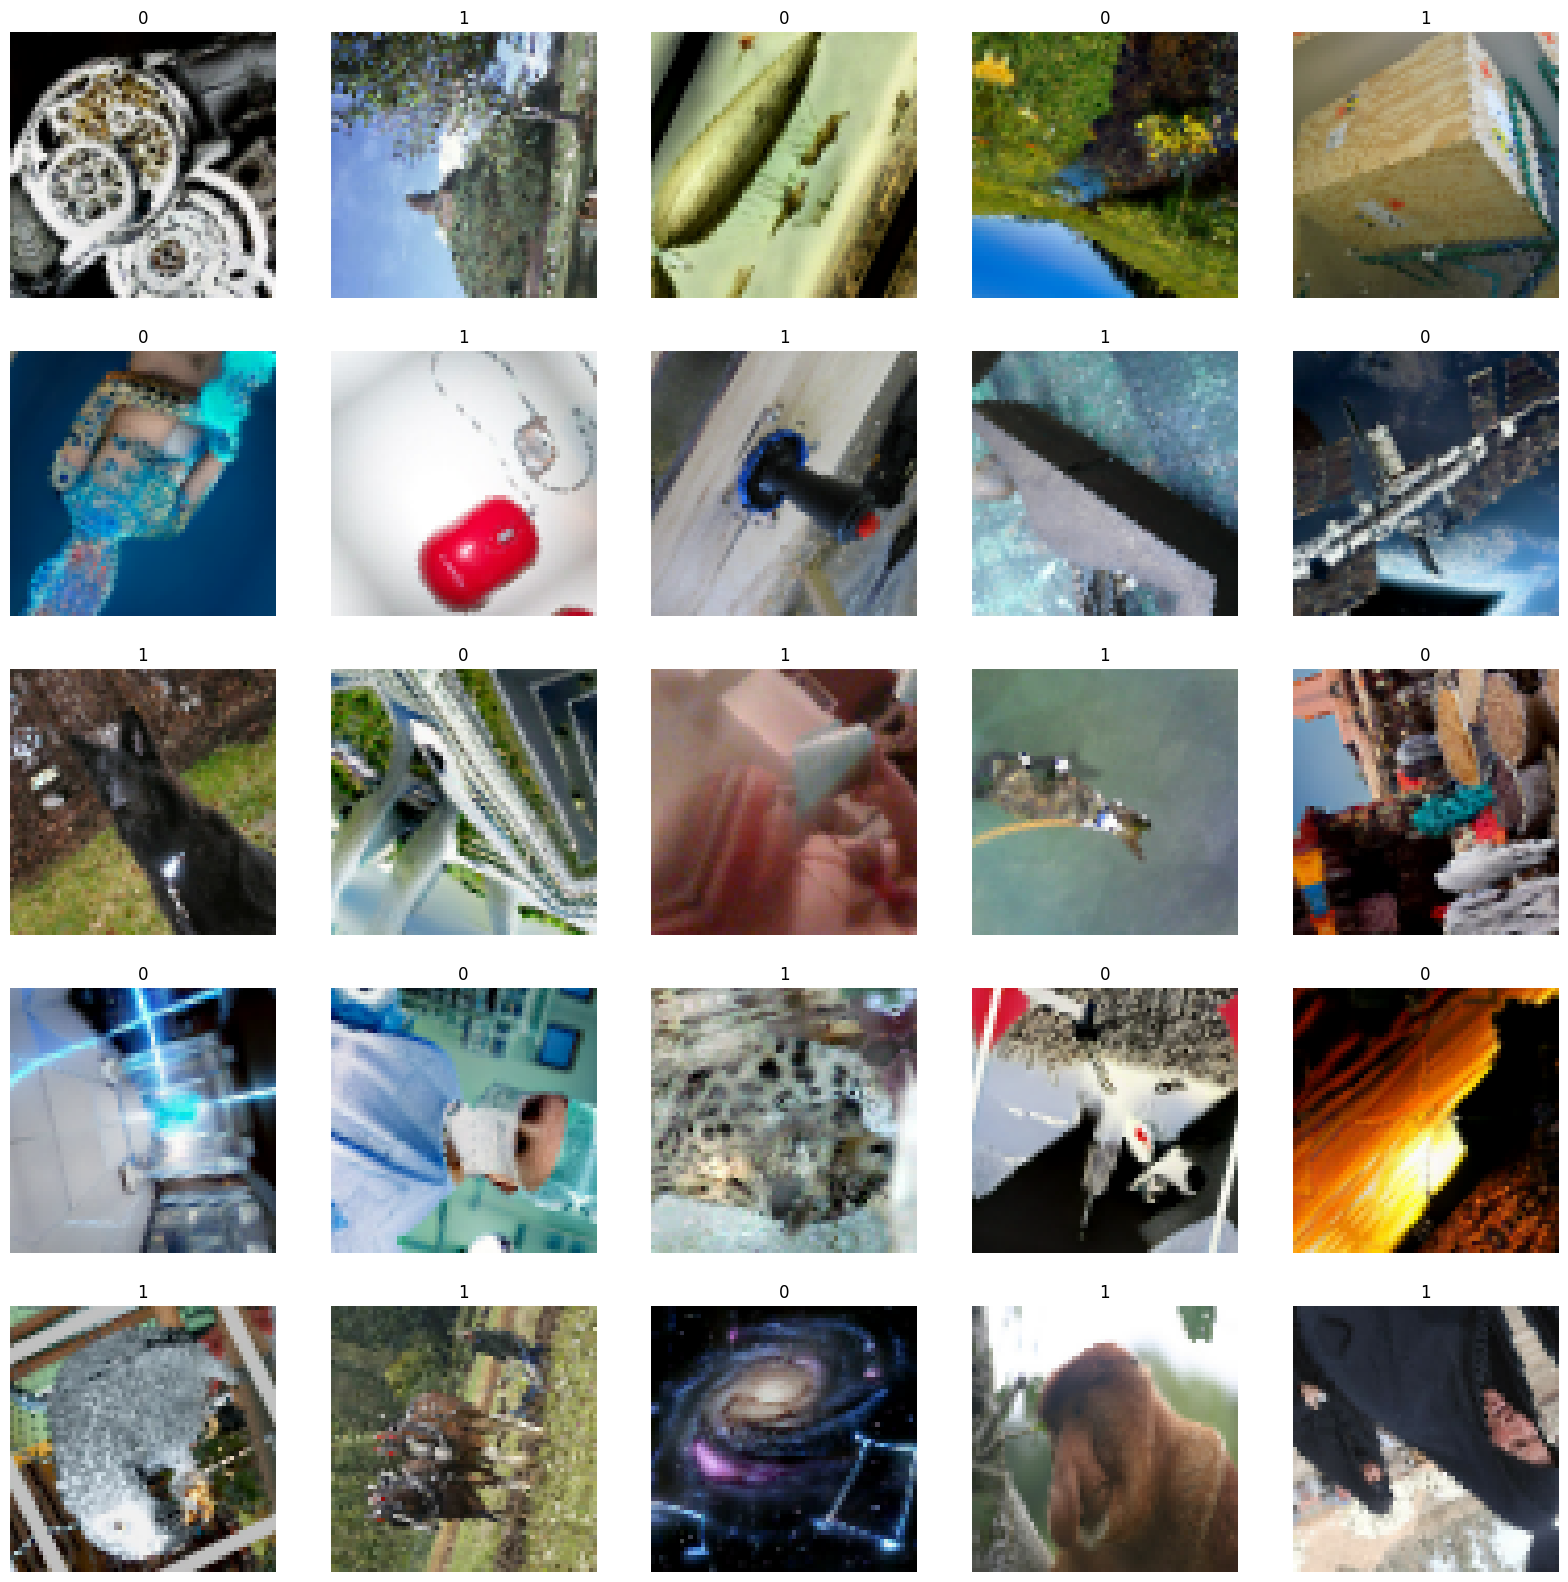

In [32]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size,
  labels='inferred',)


class_names = dir1_dataset.class_names
print("Class names:", class_names)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
])

print(len(dir1_dataset))
dataset = dir1_dataset
final_dataset = dataset.map(lambda x,y: (data_augmentation(x, training=True),y))

plt.figure(figsize=(20,20))
for images, labels in final_dataset.take(5):

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis("off")

final_dataset = dir1_dataset

In [33]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [34]:
len(final_shuffled_dataset)

340

In [35]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 217
validation_dataset size: 55
test_dataset size 68


**ResNet 모델로 Transfer Learning**

In [36]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256   

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

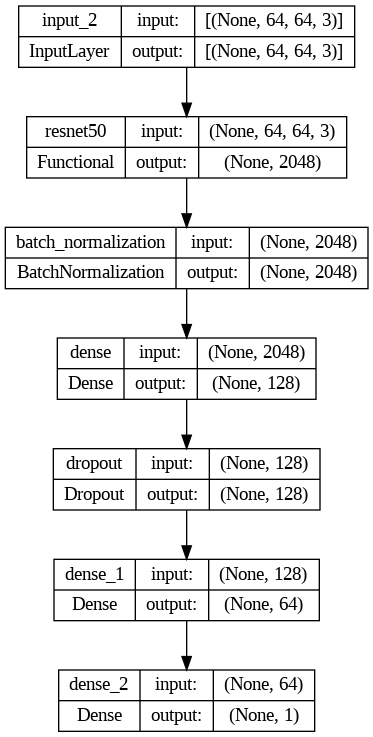

In [38]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [39]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
217/217 [==============================] - 63s 98ms/step - loss: 2.2375 - accuracy: 0.7674 - precision: 0.7670 - recall: 0.8668 - val_loss: 2.3105 - val_accuracy: 0.6622 - val_precision: 0.9958 - val_recall: 0.4326
Epoch 2/10
217/217 [==============================] - 25s 79ms/step - loss: 1.2286 - accuracy: 0.8999 - precision: 0.9194 - recall: 0.9095 - val_loss: 1.0325 - val_accuracy: 0.9033 - val_precision: 0.8613 - val_recall: 0.9911
Epoch 3/10
217/217 [==============================] - 24s 78ms/step - loss: 0.7302 - accuracy: 0.9329 - precision: 0.9475 - recall: 0.9372 - val_loss: 1.7538 - val_accuracy: 0.6811 - val_precision: 0.6442 - val_recall: 0.9994
Epoch 4/10
217/217 [==============================] - 25s 79ms/step - loss: 0.4500 - accuracy: 0.9516 - precision: 0.9648 - recall: 0.9518 - val_loss: 0.4945 - val_accuracy: 0.9091 - val_precision: 0.8697 - val_recall: 0.9957
Epoch 5/10
217/217 [=================

# **검증**

In [40]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 8s 10ms/step - loss: 0.0702 - accuracy: 0.9953 - precision: 0.9939 - recall: 0.9982
Val Loss: 0.0702
Val Accuracy: 0.9953
Val Precision: 0.9939
Val Recall: 0.9982


In [41]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 8s 11ms/step - loss: 0.0785 - accuracy: 0.9909 - precision: 0.9871 - recall: 0.9975
test Loss: 0.0785
test Accuracy: 0.9909
test Precision: 0.9871
test Recall: 0.9975


In [54]:
#모델 저장
ResNet_model.save('ResNet_dali_64_10.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
ResNet_model = tf.keras.models.load_model('ResNet_dali_64_10.h5')

# **[ Evaluation ] Confusion Matrix, ROC curve, F1 score**

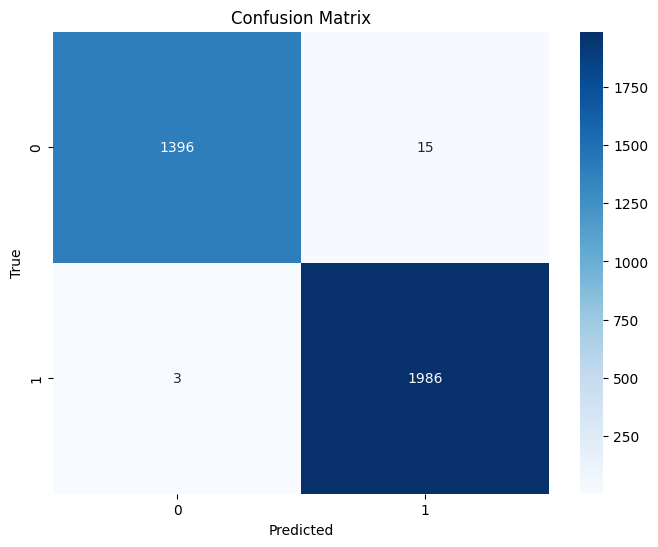

Accuracy: 0.9947058823529412
Precision: 0.992503748125937
Recall: 0.9984917043740573
F1 Score: 0.9954887218045113


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

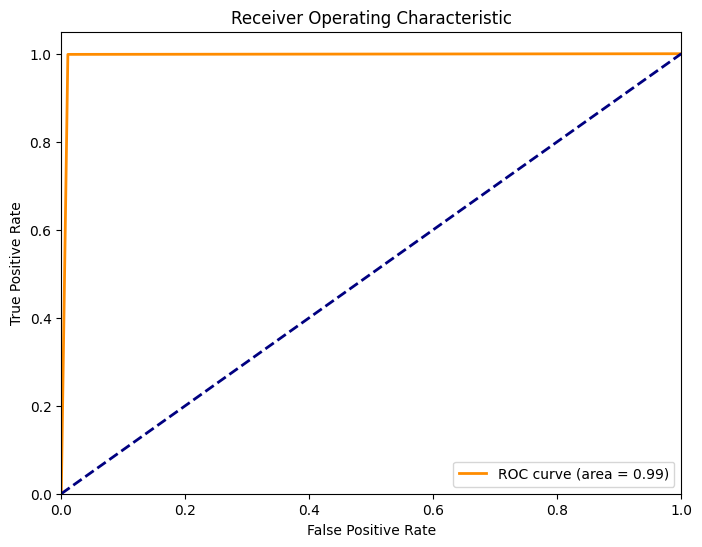

In [57]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1986
True Negative (TN): 1396
False Positive (FP): 15
False Negative (FN): 3


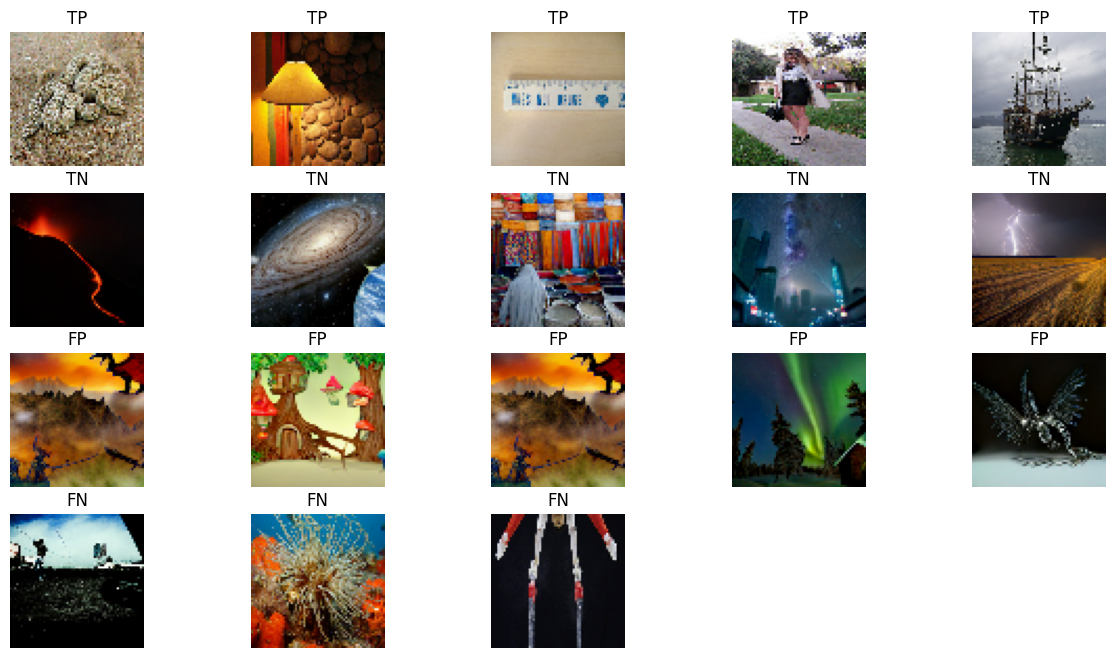

In [59]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

**VGG16 모델**

In [46]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



58889256/58889256 [==============================] - 4s 0us/step


In [47]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [48]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                           

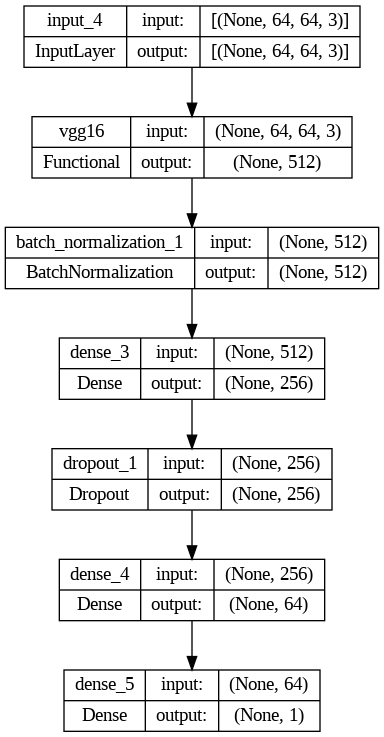

In [49]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [51]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
217/217 [==============================] - 23s 71ms/step - loss: 0.2789 - accuracy: 0.9315 - precision_1: 0.9425 - recall_1: 0.9406 - val_loss: 0.3935 - val_accuracy: 0.8731 - val_precision_1: 0.8289 - val_recall_1: 0.9964
Epoch 2/10
217/217 [==============================] - 23s 71ms/step - loss: 0.2207 - accuracy: 0.9466 - precision_1: 0.9574 - recall_1: 0.9518 - val_loss: 0.2192 - val_accuracy: 0.9452 - val_precision_1: 0.9335 - val_recall_1: 0.9780
Epoch 3/10
217/217 [==============================] - 23s 71ms/step - loss: 0.1936 - accuracy: 0.9548 - precision_1: 0.9640 - recall_1: 0.9589 - val_loss: 0.3202 - val_accuracy: 0.8971 - val_precision_1: 0.8554 - val_recall_1: 0.9951
Epoch 4/10
217/217 [==============================] - 23s 71ms/step - loss: 0.1690 - accuracy: 0.9593 - precision_1: 0.9689 - recall_1: 0.9620 - val_loss: 0.1726 - val_accuracy: 0.9575 - val_precision_1: 0.9428 - val_recall_1: 0.9869
Epoch 5/

validation_dataset으로 검증

In [52]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 8s 13ms/step - loss: 0.0473 - accuracy: 0.9975 - precision_1: 0.9982 - recall_1: 0.9976
val Loss: 0.0473
Val Accuracy: 0.9975
Val Precision: 0.9982
Val Recall: 0.9976


테스트셋으로 검증

In [53]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 9s 13ms/step - loss: 0.0522 - accuracy: 0.9962 - precision_1: 0.9960 - recall_1: 0.9975
test Loss: 0.0522
test Accuracy: 0.9962
test Precision: 0.9960
test Recall: 0.9975


In [60]:
VGG_model.save('VGG16_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
VGG_model = tf.keras.models.load_model('VGG16_model.h5')

# **[ Evaluation ] Confusion Matrix, ROC curve, F1 score**

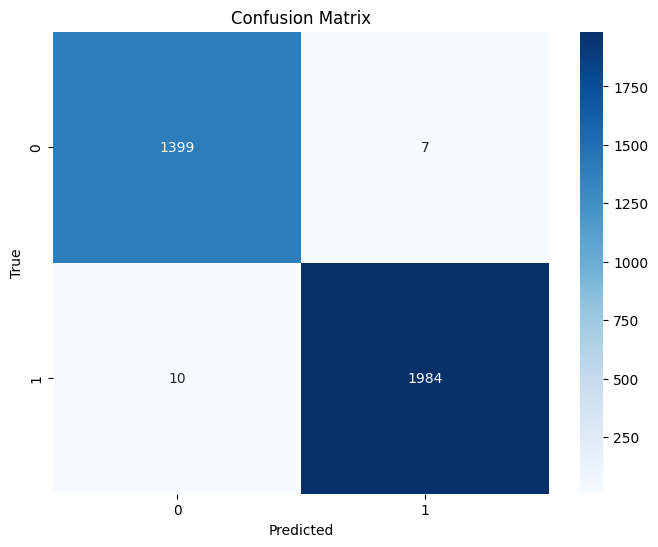

Accuracy: 0.995
Precision: 0.9964841788046208
Recall: 0.9949849548645938
F1 Score: 0.9957340025094102


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

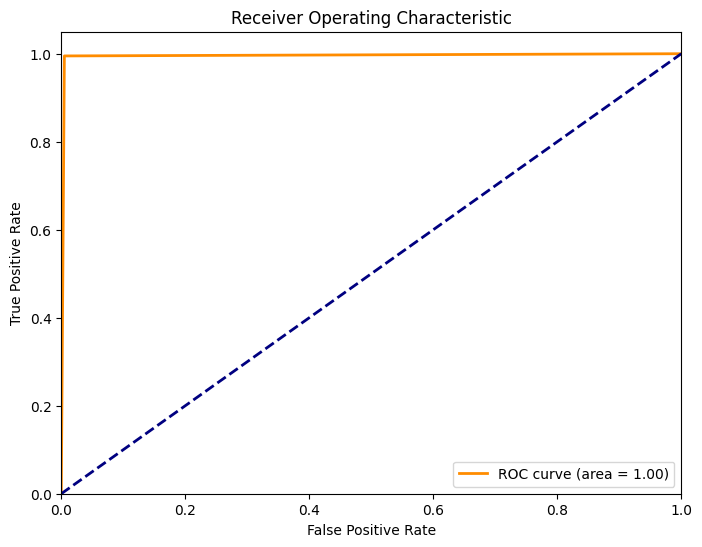

In [63]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [64]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1984
True Negative (TN): 1399
False Positive (FP): 7
False Negative (FN): 10


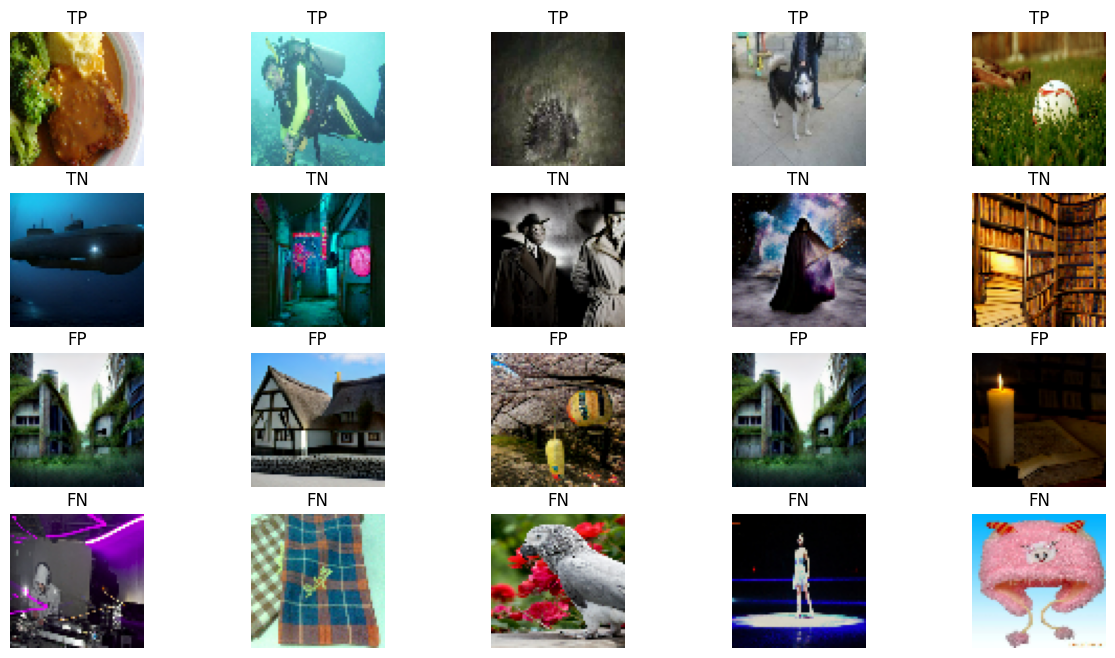

In [65]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

### **ResNet_openjourney_64_10**

In [66]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/fake/SyntheticEye AI-Generated Images Dataset/Openjourney'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected2/selected_fake_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 7000

# source_folder 내의 모든 파일 목록 가져오기
all_image_files = []
for item_name in os.listdir(source_folder):
    item_path = os.path.join(source_folder, item_name)
    # 폴더인지 확인
    if os.path.isdir(item_path):
        # 폴더 내의 이미지 파일 목록 추가
        all_image_files.extend([os.path.join(item_path, file) for file in os.listdir(item_path) if file.endswith('.png')])
    elif item_name.endswith('.png'):
        # 폴더가 아닌 이미지 파일 목록 추가
        all_image_files.append(item_path)

# 이미지 파일 목록에서 랜덤하게 선택
selected_real_images = random.sample(all_image_files, min(num_images_to_select, len(all_image_files)))

# 선택된 이미지를 대상 폴더로 복사
for source_image_path in selected_real_images:
    image_name = os.path.basename(source_image_path)
    destination_image_path = os.path.join(destination_folder, image_name)
    shutil.copy(source_image_path, destination_image_path)

print(f"{min(num_images_to_select, len(all_image_files))}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


7000개의 이미지를 랜덤으로 선택하여 /content/selected2/selected_fake_images 폴더에 복사했습니다.


In [67]:
directory = '/content/selected/selected_fake_images'
file_count = len(os.listdir(directory))

print("Number of files in the directory:", file_count)

Number of files in the directory: 7000


In [71]:
!cp -r /content/selected/selected_real_images /content/selected2/selected_real_images

In [72]:
directory = '/content/selected2/selected_real_images'
file_count = len(os.listdir(directory))

print("Number of files in the directory:", file_count)

Number of files in the directory: 9989


**데이터 처리**

데이터 가져오기

In [73]:
dataset_dir1 = "/content/selected2"
print("Loading dataset from: " + dataset_dir1)

Loading dataset from: /content/selected2


In [74]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Found 16989 files belonging to 2 classes.
Class names: ['selected_fake_images', 'selected_real_images']
340


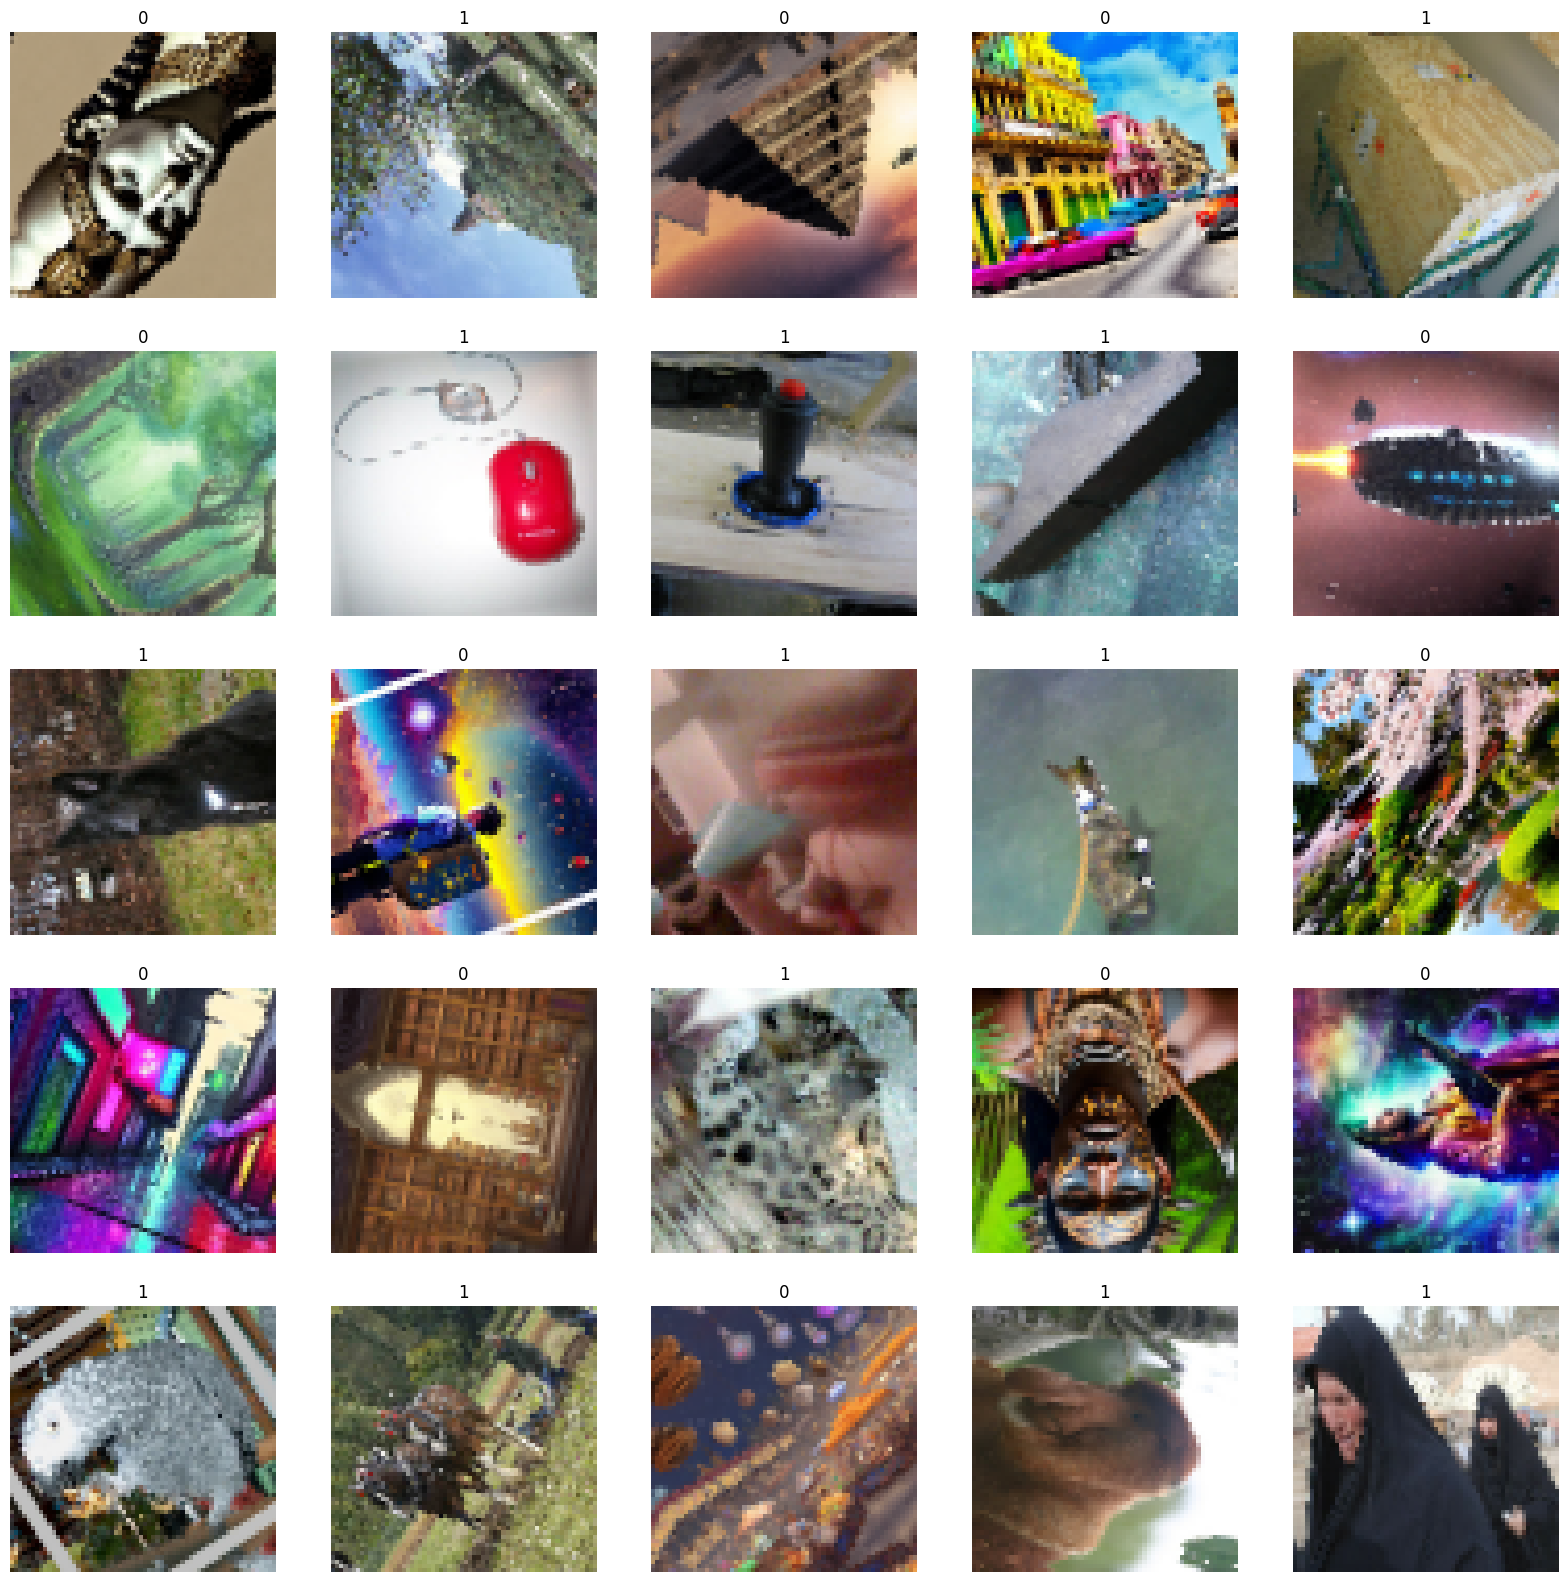

In [75]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size,
  labels='inferred',)


class_names = dir1_dataset.class_names
print("Class names:", class_names)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
])

print(len(dir1_dataset))
dataset = dir1_dataset
final_dataset = dataset.map(lambda x,y: (data_augmentation(x, training=True),y))

plt.figure(figsize=(20,20))
for images, labels in final_dataset.take(5):

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis("off")

final_dataset = dir1_dataset

In [76]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [77]:
len(final_shuffled_dataset)

340

In [78]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 217
validation_dataset size: 55
test_dataset size 68


**ResNet 모델로 Transfer Learning**

In [79]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                           

In [80]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

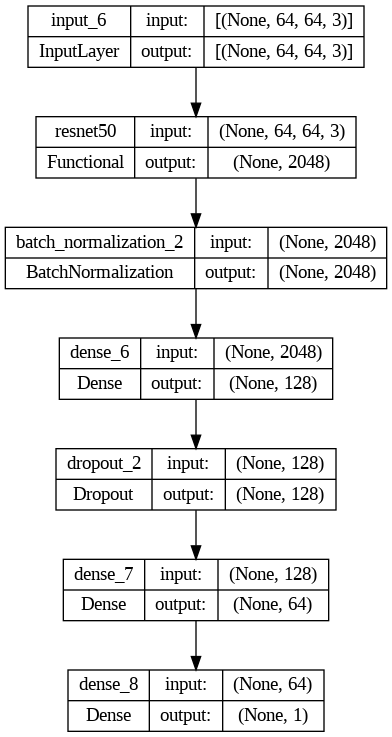

In [81]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [82]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
217/217 [==============================] - 70s 127ms/step - loss: 2.0578 - accuracy: 0.8431 - precision_2: 0.8463 - recall_2: 0.8951 - val_loss: 1.6306 - val_accuracy: 0.9211 - val_precision_2: 0.9159 - val_recall_2: 0.9547
Epoch 2/10
217/217 [==============================] - 42s 120ms/step - loss: 1.0311 - accuracy: 0.9145 - precision_2: 0.9274 - recall_2: 0.9272 - val_loss: 1.0865 - val_accuracy: 0.8095 - val_precision_2: 0.7515 - val_recall_2: 0.9981
Epoch 3/10
217/217 [==============================] - 42s 121ms/step - loss: 0.5993 - accuracy: 0.9300 - precision_2: 0.9370 - recall_2: 0.9436 - val_loss: 0.4821 - val_accuracy: 0.9244 - val_precision_2: 0.8979 - val_recall_2: 0.9805
Epoch 4/10
217/217 [==============================] - 42s 120ms/step - loss: 0.3812 - accuracy: 0.9403 - precision_2: 0.9458 - recall_2: 0.9521 - val_loss: 0.4094 - val_accuracy: 0.9222 - val_precision_2: 0.8868 - val_recall_2: 0.9957
E

# **검증**

In [83]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 16s 11ms/step - loss: 0.1650 - accuracy: 0.9513 - precision_2: 0.9993 - recall_2: 0.9185
Val Loss: 0.1650
Val Accuracy: 0.9513
Val Precision: 0.9993
Val Recall: 0.9185


In [84]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 17s 12ms/step - loss: 0.1600 - accuracy: 0.9550 - precision_2: 0.9989 - recall_2: 0.9242
test Loss: 0.1600
test Accuracy: 0.9550
test Precision: 0.9989
test Recall: 0.9242


In [85]:
#모델 저장
ResNet_model.save('ResNet_open_64_10.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
ResNet_model = tf.keras.models.load_model('ResNet_open_64_10.h5')

# **[ Evaluation ] Confusion Matrix, ROC curve, F1 score**

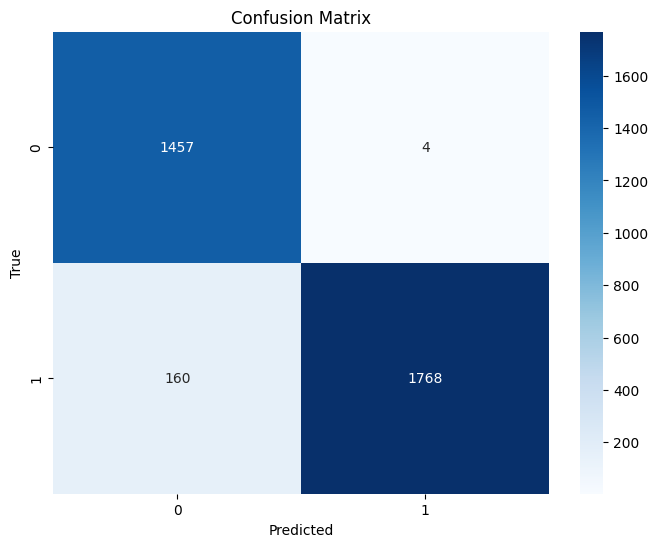

Accuracy: 0.9516081439952788
Precision: 0.9977426636568849
Recall: 0.91701244813278
F1 Score: 0.9556756756756757


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

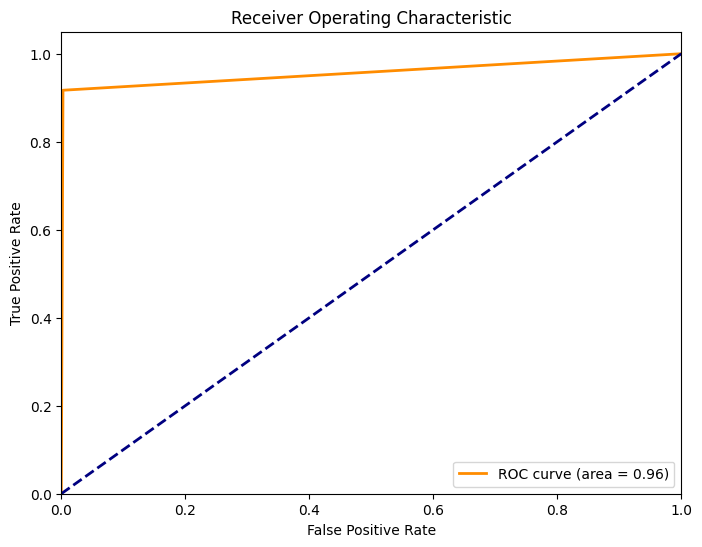

In [88]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [89]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1768
True Negative (TN): 1457
False Positive (FP): 4
False Negative (FN): 160


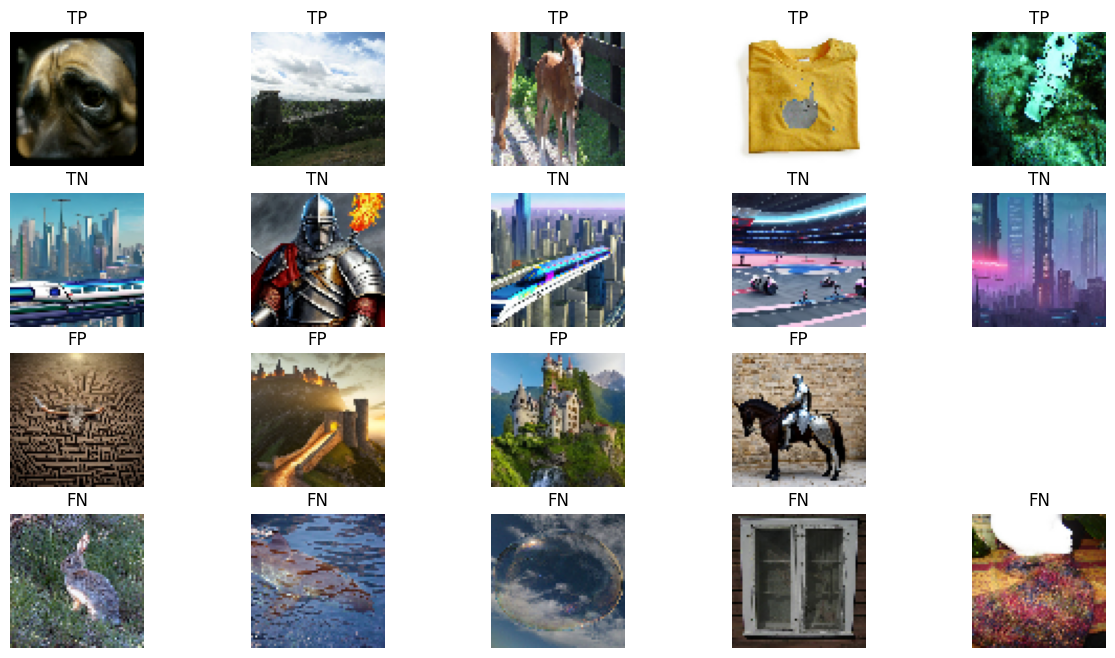

In [90]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

**VGG16 모델**

In [91]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [92]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                           

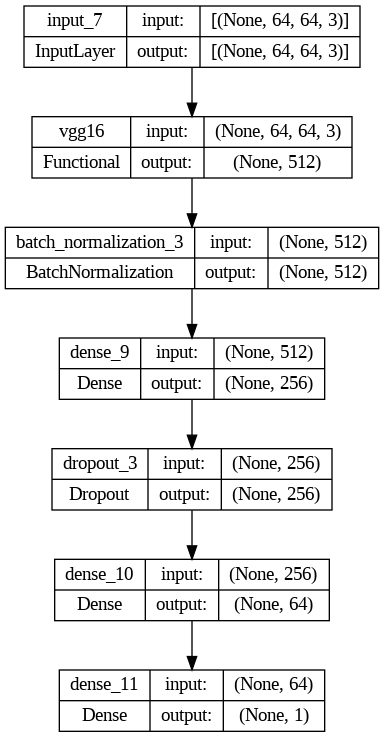

In [93]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [94]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
217/217 [==============================] - 46s 115ms/step - loss: 1.5063 - accuracy: 0.8984 - precision_3: 0.9052 - recall_3: 0.9237 - val_loss: 0.8537 - val_accuracy: 0.8942 - val_precision_3: 0.9845 - val_recall_3: 0.8315
Epoch 2/10
217/217 [==============================] - 40s 111ms/step - loss: 0.5977 - accuracy: 0.9380 - precision_3: 0.9455 - recall_3: 0.9508 - val_loss: 0.4658 - val_accuracy: 0.9418 - val_precision_3: 0.9177 - val_recall_3: 0.9881
Epoch 3/10
217/217 [==============================] - 39s 108ms/step - loss: 0.3729 - accuracy: 0.9487 - precision_3: 0.9541 - recall_3: 0.9586 - val_loss: 0.2893 - val_accuracy: 0.9660 - val_precision_3: 0.9618 - val_recall_3: 0.9805
Epoch 4/10
217/217 [==============================] - 40s 110ms/step - loss: 0.2668 - accuracy: 0.9571 - precision_3: 0.9633 - recall_3: 0.9640 - val_loss: 0.2255 - val_accuracy: 0.9609 - val_precision_3: 0.9520 - val_recall_3: 0.9825
Epoc

validation_dataset으로 검증

In [95]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 16s 14ms/step - loss: 0.1188 - accuracy: 0.9731 - precision_3: 0.9987 - recall_3: 0.9547
val Loss: 0.1188
Val Accuracy: 0.9731
Val Precision: 0.9987
Val Recall: 0.9547


테스트셋으로 검증

In [96]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 17s 14ms/step - loss: 0.1272 - accuracy: 0.9691 - precision_3: 0.9953 - recall_3: 0.9516
test Loss: 0.1272
test Accuracy: 0.9691
test Precision: 0.9953
test Recall: 0.9516


In [97]:
VGG_model.save('VGG16_open_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
VGG_model = tf.keras.models.load_model('VGG16_open_model.h5')

# **[ Evaluation ] Confusion Matrix, ROC curve, F1 score**

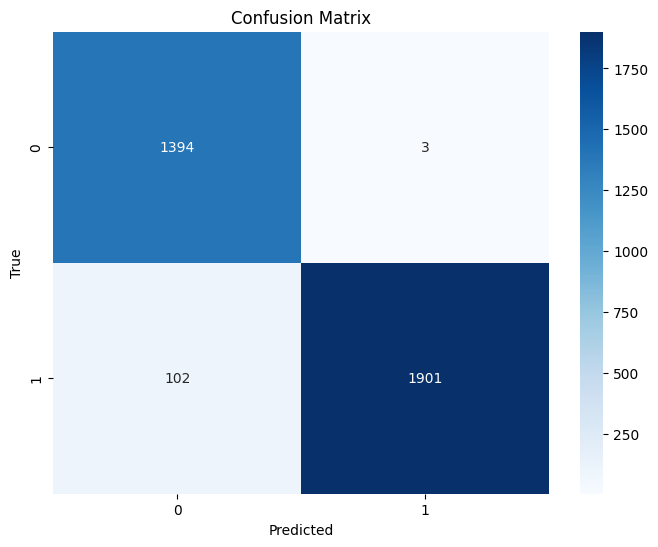

Accuracy: 0.9691176470588235
Precision: 0.9984243697478992
Recall: 0.9490763854218672
F1 Score: 0.9731251599692858


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

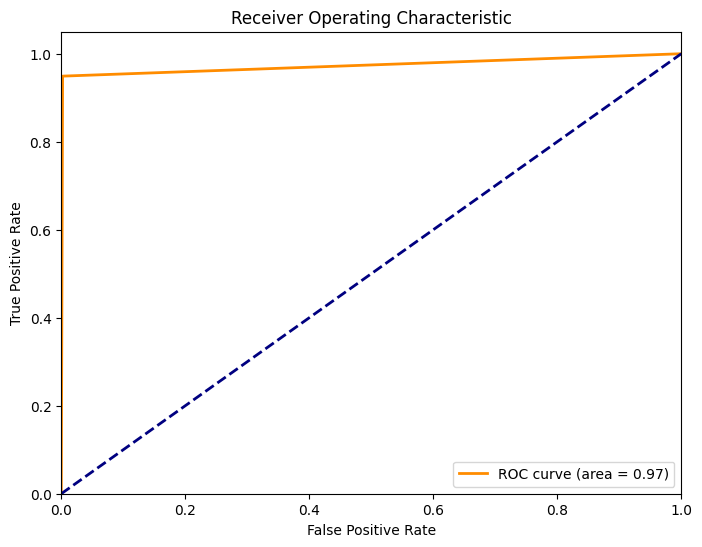

In [100]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [101]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1901
True Negative (TN): 1394
False Positive (FP): 3
False Negative (FN): 102


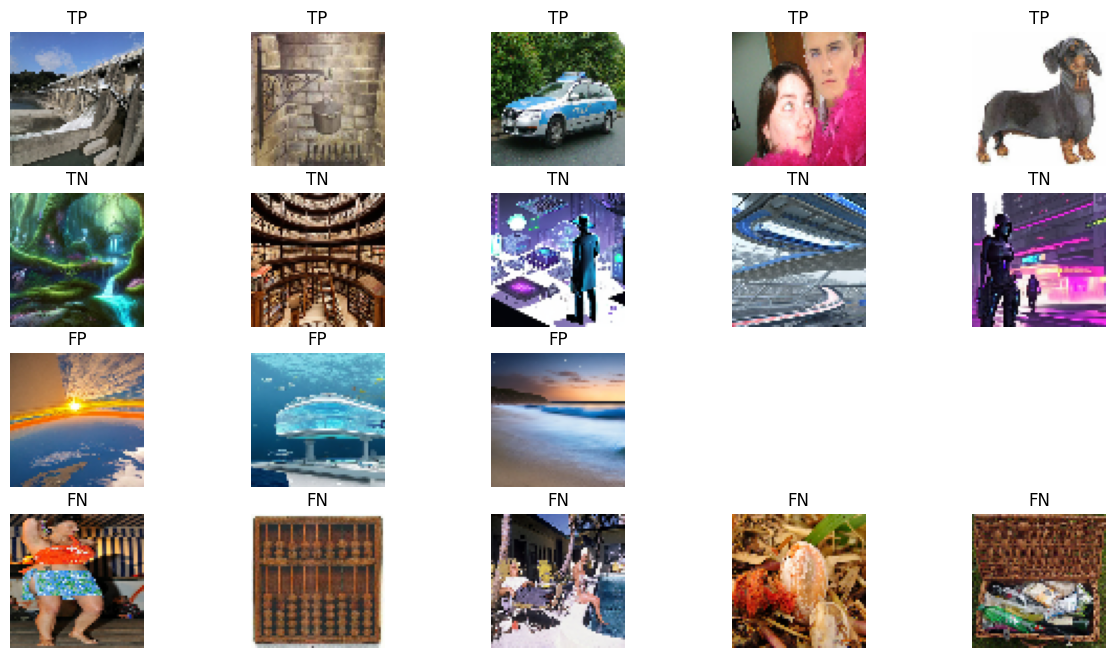

In [102]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

## **ResNet_SD_64_10**

In [123]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/fake/SyntheticEye AI-Generated Images Dataset/StableDiffusion'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected3/selected_fake_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 7000

# source_folder 내의 모든 파일 목록 가져오기
all_image_files = []
for item_name in os.listdir(source_folder):
    item_path = os.path.join(source_folder, item_name)
    # 폴더인지 확인
    if os.path.isdir(item_path):
        # 폴더 내의 이미지 파일 목록 추가
        all_image_files.extend([os.path.join(item_path, file) for file in os.listdir(item_path) if file.endswith('.jpg')])
    elif item_name.endswith('.jpg'):
        # 폴더가 아닌 이미지 파일 목록 추가
        all_image_files.append(item_path)

# 이미지 파일 목록에서 랜덤하게 선택
selected_real_images = random.sample(all_image_files, min(num_images_to_select, len(all_image_files)))

# 선택된 이미지를 대상 폴더로 복사
for source_image_path in selected_real_images:
    image_name = os.path.basename(source_image_path)
    destination_image_path = os.path.join(destination_folder, image_name)
    shutil.copy(source_image_path, destination_image_path)

print(f"{min(num_images_to_select, len(all_image_files))}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


7000개의 이미지를 랜덤으로 선택하여 /content/selected3/selected_fake_images 폴더에 복사했습니다.


In [124]:
directory = '/content/selected3/selected_fake_images'
file_count = len(os.listdir(directory))

print("Number of files in the directory:", file_count)

Number of files in the directory: 7000


In [105]:
!cp -r /content/selected/selected_real_images /content/selected3/selected_real_images

In [125]:
directory = '/content/selected3/selected_real_images'
file_count = len(os.listdir(directory))

print("Number of files in the directory:", file_count)

Number of files in the directory: 9989


**데이터 처리**

데이터 가져오기

In [126]:
dataset_dir1 = "/content/selected3"
print("Loading dataset from: " + dataset_dir1)

Loading dataset from: /content/selected3


In [127]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Found 16989 files belonging to 2 classes.
Class names: ['selected_fake_images', 'selected_real_images']
340


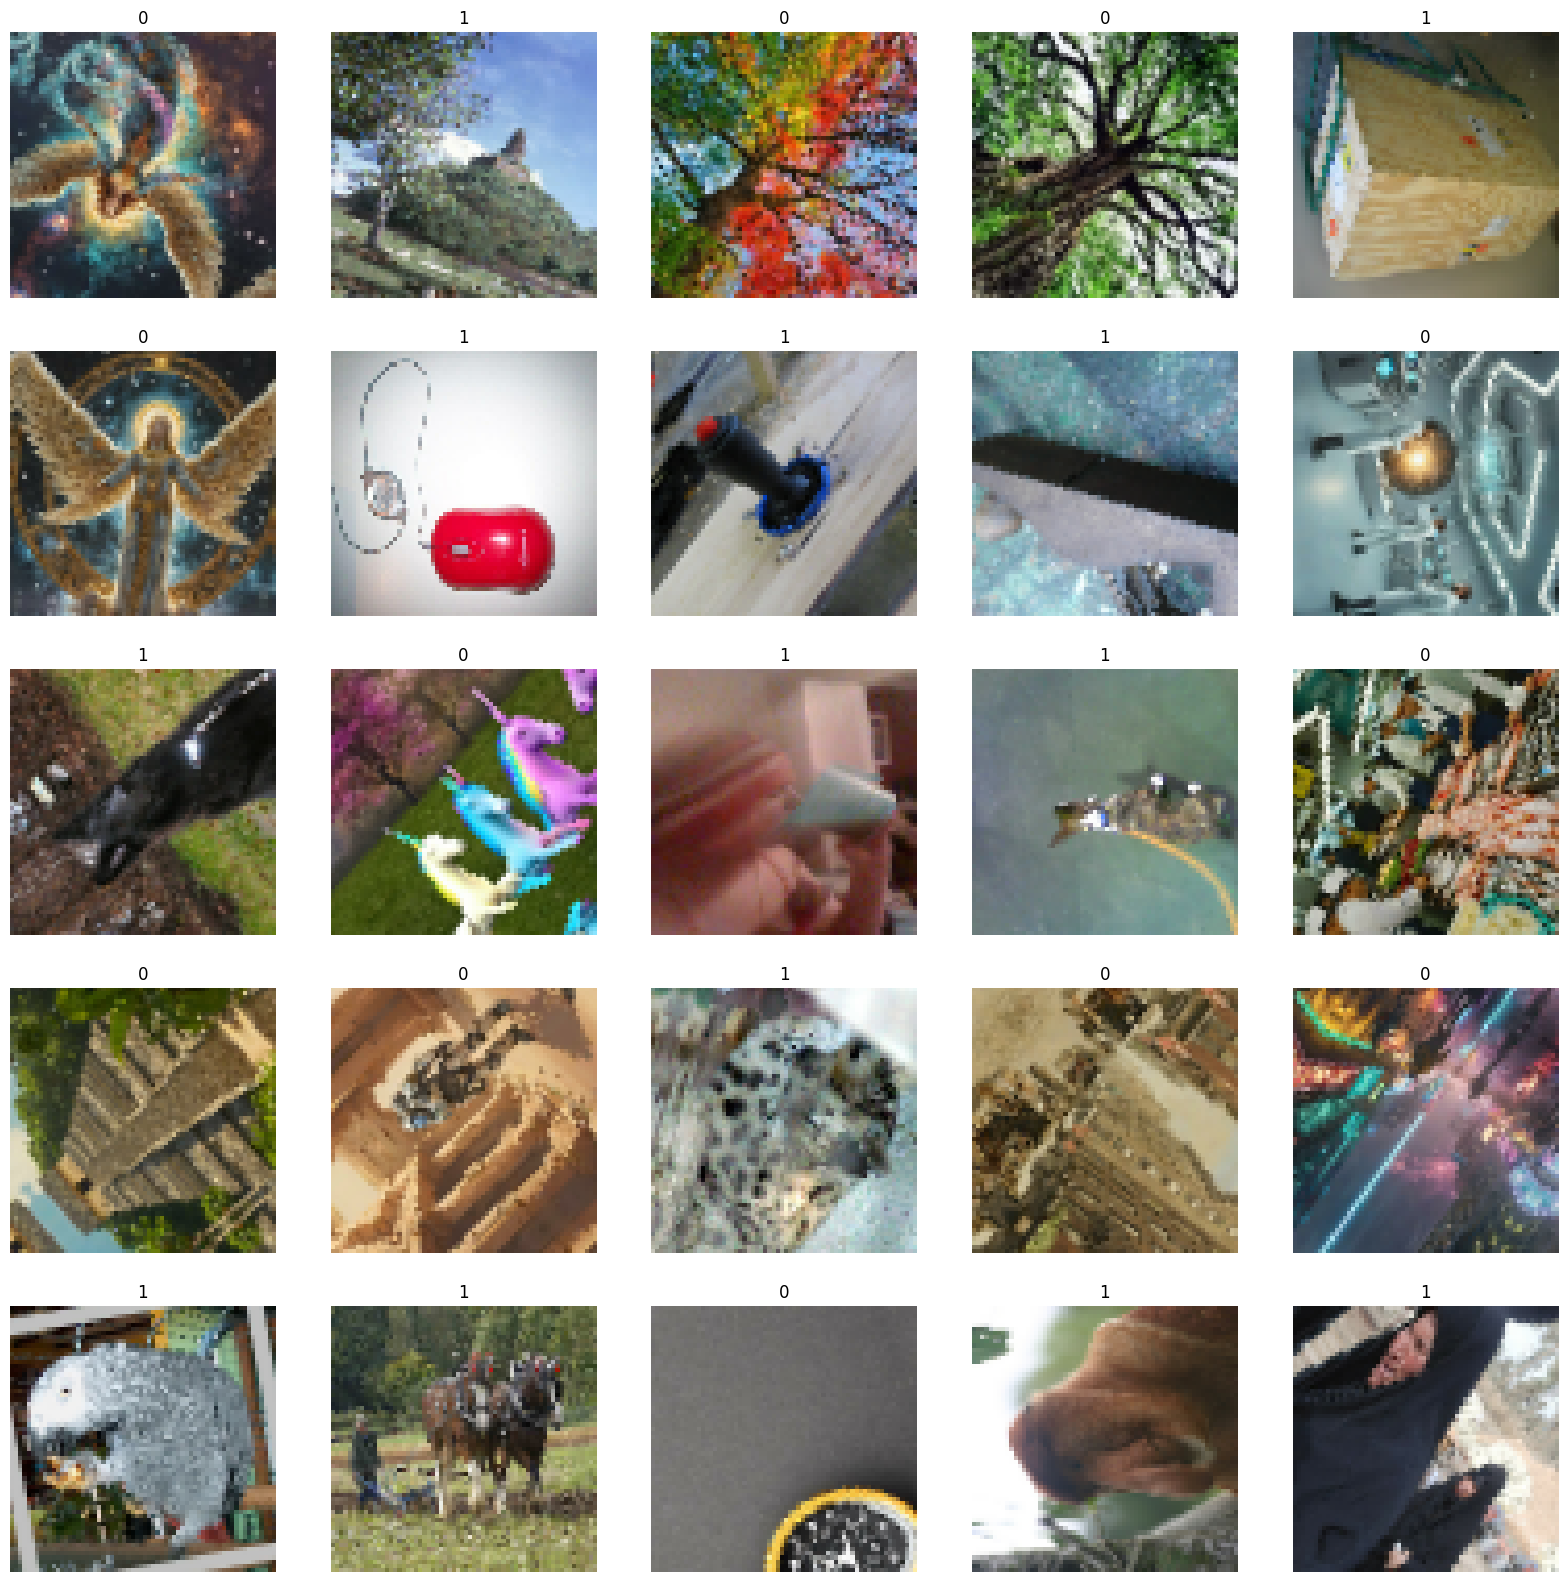

In [128]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size,
  labels='inferred',)


class_names = dir1_dataset.class_names
print("Class names:", class_names)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
])

print(len(dir1_dataset))
dataset = dir1_dataset
final_dataset = dataset.map(lambda x,y: (data_augmentation(x, training=True),y))

plt.figure(figsize=(20,20))
for images, labels in final_dataset.take(5):

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis("off")

final_dataset = dir1_dataset

In [129]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [130]:
len(final_shuffled_dataset)

340

In [131]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 217
validation_dataset size: 55
test_dataset size 68


**ResNet 모델로 Transfer Learning**

In [132]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_5 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 128)               262272    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                           

In [133]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

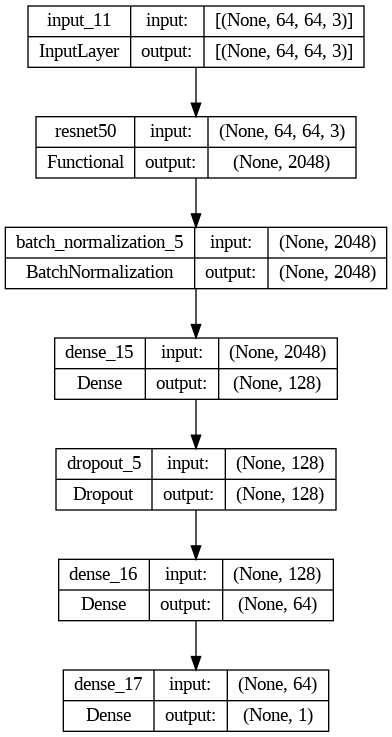

In [134]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [135]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
217/217 [==============================] - 54s 89ms/step - loss: 2.1646 - accuracy: 0.7365 - precision_5: 0.7698 - recall_5: 0.7860 - val_loss: 4.2305 - val_accuracy: 0.5935 - val_precision_5: 0.5935 - val_recall_5: 1.0000
Epoch 2/10
217/217 [==============================] - 24s 78ms/step - loss: 1.1085 - accuracy: 0.8564 - precision_5: 0.8758 - recall_5: 0.8806 - val_loss: 1.1279 - val_accuracy: 0.8233 - val_precision_5: 0.7691 - val_recall_5: 0.9892
Epoch 3/10
217/217 [==============================] - 24s 76ms/step - loss: 0.6830 - accuracy: 0.8783 - precision_5: 0.8869 - recall_5: 0.9075 - val_loss: 1.4005 - val_accuracy: 0.6400 - val_precision_5: 0.6160 - val_recall_5: 0.9987
Epoch 4/10
217/217 [==============================] - 24s 78ms/step - loss: 0.4716 - accuracy: 0.8942 - precision_5: 0.9020 - recall_5: 0.9183 - val_loss: 0.6413 - val_accuracy: 0.8087 - val_precision_5: 0.7569 - val_recall_5: 0.9975
Epoch

# **검증**

In [136]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 8s 9ms/step - loss: 0.4818 - accuracy: 0.8487 - precision_5: 0.7983 - recall_5: 0.9969
Val Loss: 0.4818
Val Accuracy: 0.8487
Val Precision: 0.7983
Val Recall: 0.9969


In [137]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 8s 9ms/step - loss: 0.5166 - accuracy: 0.8397 - precision_5: 0.7859 - recall_5: 0.9985
test Loss: 0.5166
test Accuracy: 0.8397
test Precision: 0.7859
test Recall: 0.9985


In [138]:
#모델 저장
ResNet_model.save('ResNet_SD_64_10.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [139]:
ResNet_model = tf.keras.models.load_model('ResNet_SD_64_10.h5')

# **[ Evaluation ] Confusion Matrix, ROC curve, F1 score**

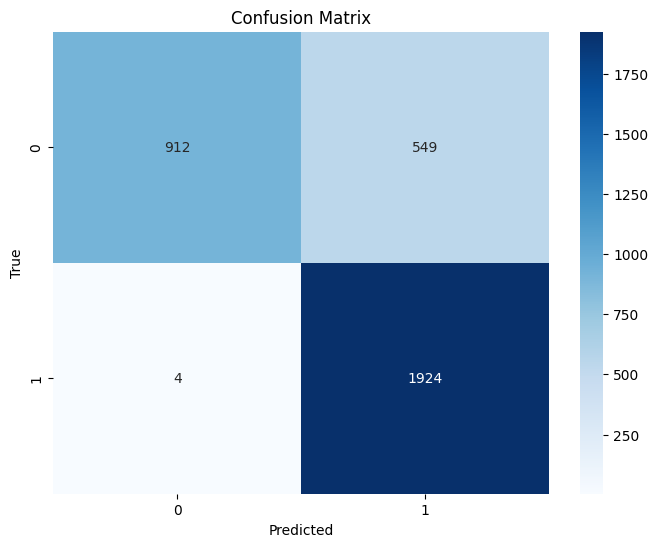

Accuracy: 0.836825022130422
Precision: 0.7780024262029923
Recall: 0.9979253112033195
F1 Score: 0.8743467393774141


In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

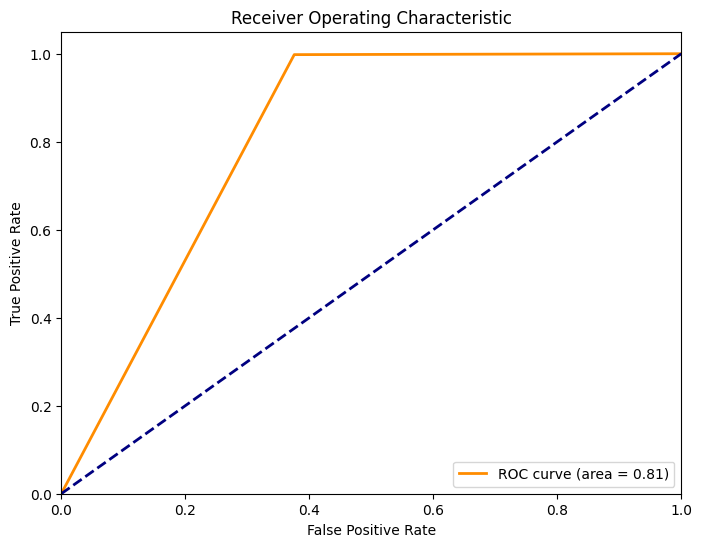

In [141]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [142]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1924
True Negative (TN): 912
False Positive (FP): 549
False Negative (FN): 4


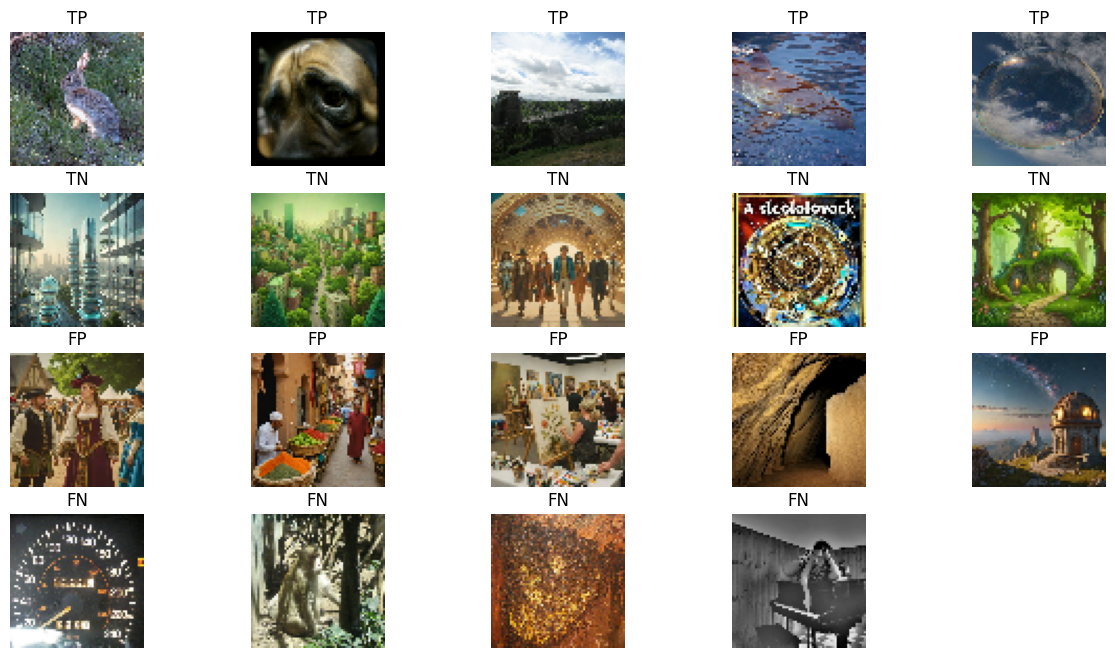

In [143]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

**VGG16 모델**

In [144]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [145]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                           

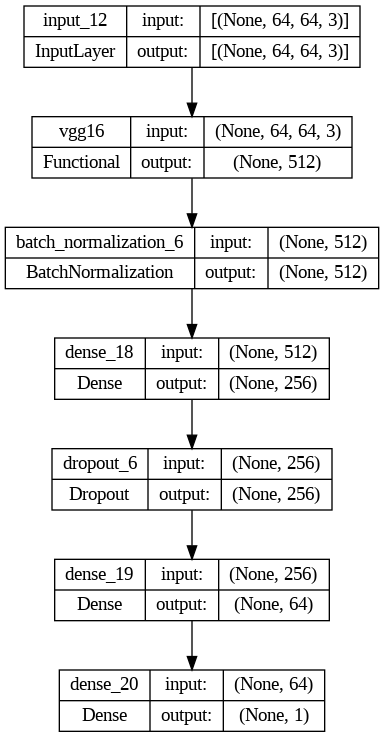

In [146]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [147]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
217/217 [==============================] - 27s 72ms/step - loss: 1.6879 - accuracy: 0.8818 - precision_6: 0.8754 - recall_6: 0.9312 - val_loss: 1.0629 - val_accuracy: 0.8178 - val_precision_6: 0.9576 - val_recall_6: 0.7191
Epoch 2/10
217/217 [==============================] - 22s 69ms/step - loss: 0.7429 - accuracy: 0.9169 - precision_6: 0.9139 - recall_6: 0.9500 - val_loss: 0.5978 - val_accuracy: 0.9051 - val_precision_6: 0.9457 - val_recall_6: 0.8869
Epoch 3/10
217/217 [==============================] - 23s 70ms/step - loss: 0.4726 - accuracy: 0.9285 - precision_6: 0.9255 - recall_6: 0.9548 - val_loss: 1.0572 - val_accuracy: 0.6254 - val_precision_6: 0.6082 - val_recall_6: 1.0000
Epoch 4/10
217/217 [==============================] - 22s 69ms/step - loss: 0.3314 - accuracy: 0.9401 - precision_6: 0.9421 - recall_6: 0.9571 - val_loss: 0.9686 - val_accuracy: 0.9445 - val_precision_6: 0.9658 - val_recall_6: 0.9380
Epoch 5/

validation_dataset으로 검증

In [148]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 8s 13ms/step - loss: 0.1092 - accuracy: 0.9815 - precision_6: 0.9892 - recall_6: 0.9786
val Loss: 0.1092
Val Accuracy: 0.9815
Val Precision: 0.9892
Val Recall: 0.9786


테스트셋으로 검증

In [149]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 8s 13ms/step - loss: 0.1204 - accuracy: 0.9756 - precision_6: 0.9817 - recall_6: 0.9763
test Loss: 0.1204
test Accuracy: 0.9756
test Precision: 0.9817
test Recall: 0.9763


In [150]:
VGG_model.save('VGG16_SD_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [151]:
VGG_model = tf.keras.models.load_model('VGG16_SD_model.h5')

# **[ Evaluation ] Confusion Matrix, ROC curve, F1 score**

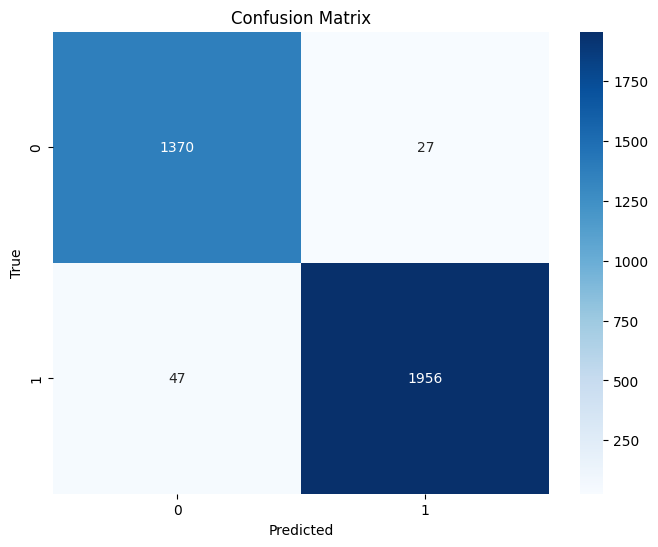

Accuracy: 0.9782352941176471
Precision: 0.9863842662632375
Recall: 0.9765351972041937
F1 Score: 0.9814350225790266


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

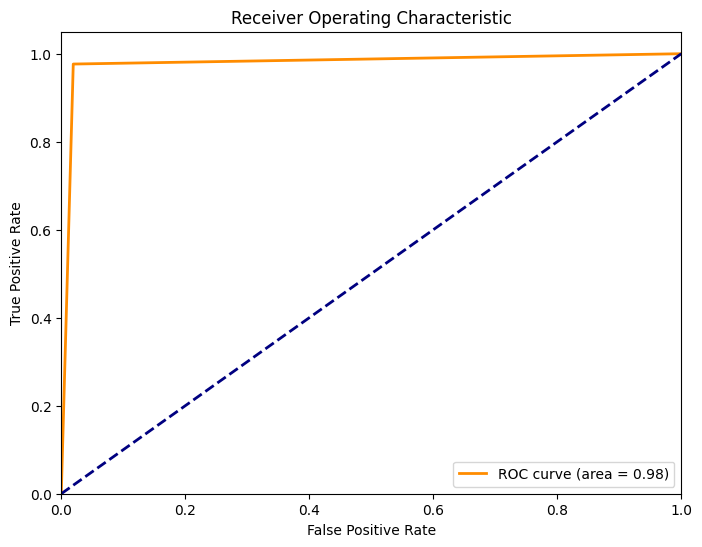

In [153]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [154]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1956
True Negative (TN): 1370
False Positive (FP): 27
False Negative (FN): 47


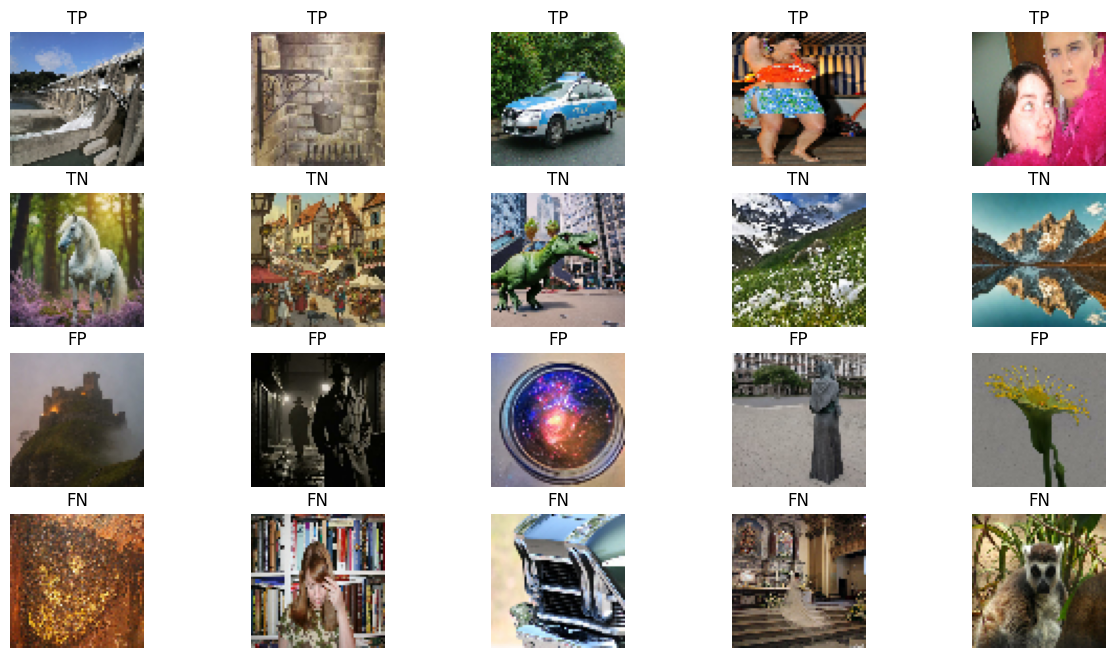

In [155]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()